In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from time import time

In [2]:
def harmonic_potential(xy):
    return np.sum(xy**2) / 2

Let's start with implementing the Metropolis rule. Encapsulating this task allows us to reuse it elsewhere, write unit tests, and replace it easily inside other functions.

**Comment**: good choice! Compact and works for vectors of arbitrary length.

This function should accept the current position, create a trial position, and return either the trial or the current position.

In [3]:
def conditional_probability(potential, xy, xy_trial):
    return np.minimum(1, np.exp(-potential(xy_trial) + potential(xy)))

**Comment**: very elegant to supply the potential function as an argument. The downsides are that you have to recompute a potential value that you might already know and that you compute the full Boltzmann factor in all cases. Here, it won't make a big differece but, in larger systems, you might want to save computational effort wherever possible.

In [4]:
conditional_probability(harmonic_potential, np.array([0,0]), np.array([1,1]))

0.36787944117144233

**Comment**: moving from $(0,0)$ to $(1,1)$ would increase your energy from $0$ to $1$; thus, your acceptance probability would be $e^{-1}$ which is the computed value. First sanity check passed!

In [5]:
def metropolis_potential(xy, potential, width=0.4):
    '''Generate a Markov chain using the Metropolis rule.
    
    We generate a Markov chain of random displacements where we assume
    the random walker to move in a potential.
    
    Arguments:
        xy (ndarray): current position inside the unit square
        width (float): width of the trial square around the current position
    '''

    xy_trial = xy + width * (np.random.rand(*xy.shape) - 0.5)
    if np.random.random() < conditional_probability(potential, xy, xy_trial):
         return xy_trial
    else:
        return xy

**Comment**: the name ``metropolis_potential`` is not a good choice as you are not computing a potential and I would not know what a _Metropolis_ potential actually is. Why not call it ``metropolis_update`` or something like that?

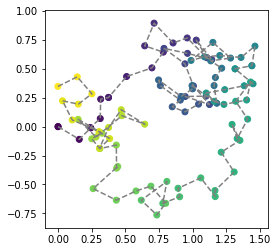

In [6]:
markov_chain = [np.asarray([0.0, 0.0])]
for i in range(100):
    markov_chain.append(metropolis_potential(markov_chain[-1], harmonic_potential))
markov_chain = np.asarray(markov_chain)

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(*markov_chain.T, '--', color='grey')
ax.scatter(*markov_chain.T, c=range(len(markov_chain)))
#ax.set_xlim(-1, 1)
#ax.set_ylim(-1, 1)

**Comment**: this output looks very reasonable!

We generated a short Markov chain and visualized how the walker moves. The colors indicate the rank inside the sequence where dark indicates early and light indicates later elements of the Markov chain.

Let's now implement the approximation function and reuse our Metropolis rule:

In [7]:
def distance_from_origin(xy):
    return np.sqrt(np.sum(xy**2))

**Comment**: again, a nice, flexible, and compact solution!

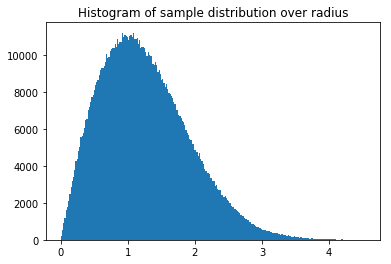

In [8]:
def sample(n_sample, width=0.4):
    '''
    
    We generate a Markov chain of random displacements moving according
    to a harmonic potential and compute the distance from the origin of
    every sample point. The function outputs this vector of distances.
    
    Arguments:
        n_sample (int): number of update steps in the Markov chain
        width (float): width of the trial square around the current position
    '''
    #xy = np.random.rand(2)
    r_vec = np.empty(n_sample)
    
    xy = np.array([0,0])
    for i in range(n_sample):
        xy = metropolis_potential(xy, harmonic_potential, width=width)
        r_vec[i] = distance_from_origin(xy)
    return r_vec


r_vec = sample(1000000, width=0.5)
plt.hist(r_vec, bins='auto')
plt.title("Histogram of sample distribution over radius")
plt.show()

# Wikipedia Boltzmann distribution
![Boltzmann distribution](https://upload.wikimedia.org/wikipedia/commons/1/19/Maxwell-Boltzmann_distribution_pdf.svg)

## Summary

I think this last application is the thing I like best! You actually put your code to the test and compare with a literature result.

All in all, I really like your work. The code is nice and clean with only a few possible changes for increased efficiency. Good job!